In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import random
import math
import time
from sklearn.linear_model import LinearRegression, BayesianRidge
from sklearn.model_selection import RandomizedSearchCV,train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error,mean_absolute_error
import datetime
import operator
plt.style.use('fivethirtyeight')
%matplotlib inline

In [2]:
# Retriving Dataset


confirmed_cases = pd.read_csv(r'C:\Users\user\DS internship\project\Covid-19 Global Forecasting\time series\time_series_covid_19_confirmed.csv')
deaths_reported = pd.read_csv(r'C:\Users\user\DS internship\project\Covid-19 Global Forecasting\time series\time_series_covid_19_deaths.csv')

recovered_cases = pd.read_csv(r'C:\Users\user\DS internship\project\Covid-19 Global Forecasting\time series\time_series_covid_19_recovered.csv')


In [3]:
confirmed_cases.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,8/3/20,8/4/20,8/5/20,8/6/20,8/7/20,8/8/20,8/9/20,8/10/20,8/11/20,8/12/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,36747,36782,36829,36896,37015,37054,37054,37162,37269,37345
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,5620,5750,5889,6016,6151,6275,6411,6536,6676,6817
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,31972,32504,33055,33626,34155,34693,35160,35712,36204,36699
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,937,939,939,944,955,955,955,963,963,977
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,1280,1344,1395,1483,1538,1572,1672,1679,1735,1762


In [4]:
deaths_reported.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,8/3/20,8/4/20,8/5/20,8/6/20,8/7/20,8/8/20,8/9/20,8/10/20,8/11/20,8/12/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,1288,1288,1294,1298,1307,1312,1312,1328,1344,1354
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,172,176,182,188,189,193,199,200,205,208
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,1239,1248,1261,1273,1282,1293,1302,1312,1322,1333
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,52,52,52,52,52,52,52,52,52,53
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,58,59,62,64,67,70,75,78,80,80


In [5]:
recovered_cases.head() 

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,8/3/20,8/4/20,8/5/20,8/6/20,8/7/20,8/8/20,8/9/20,8/10/20,8/11/20,8/12/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,25669,25669,25742,25840,25903,25960,25960,26228,26415,26694
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,3031,3031,3123,3155,3227,3268,3342,3379,3480,3552
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,21901,22375,22802,23238,23667,24083,24506,24920,25263,25627
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,821,825,825,828,839,839,839,839,839,855
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,476,503,506,520,544,564,567,569,575,577


In [6]:
cols =confirmed_cases.keys()
cols

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       ...
       '8/3/20', '8/4/20', '8/5/20', '8/6/20', '8/7/20', '8/8/20', '8/9/20',
       '8/10/20', '8/11/20', '8/12/20'],
      dtype='object', length=208)

In [7]:
confirmed =confirmed_cases.loc[:,cols[4]:cols[-1]]

In [8]:
deaths=deaths_reported.loc[:,cols[4]:cols[-1]]

In [9]:
recoveries=recovered_cases.loc[:,cols[4]:cols[-1]]

In [10]:
confirmed.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,8/3/20,8/4/20,8/5/20,8/6/20,8/7/20,8/8/20,8/9/20,8/10/20,8/11/20,8/12/20
0,0,0,0,0,0,0,0,0,0,0,...,36747,36782,36829,36896,37015,37054,37054,37162,37269,37345
1,0,0,0,0,0,0,0,0,0,0,...,5620,5750,5889,6016,6151,6275,6411,6536,6676,6817
2,0,0,0,0,0,0,0,0,0,0,...,31972,32504,33055,33626,34155,34693,35160,35712,36204,36699
3,0,0,0,0,0,0,0,0,0,0,...,937,939,939,944,955,955,955,963,963,977
4,0,0,0,0,0,0,0,0,0,0,...,1280,1344,1395,1483,1538,1572,1672,1679,1735,1762


In [11]:
dates=confirmed.keys()
world_cases=[]
total_deaths=[]
mortality_rate=[]
total_recovered=[]
for i in dates:
    confirmed_sum=confirmed[i].sum()
    death_sum=deaths[i].sum()
    recovered_sum=recoveries[i].sum()
    world_cases.append(confirmed_sum)
    total_deaths.append(death_sum)
    mortality_rate.append(death_sum/confirmed_sum)
    total_recovered.append(recovered_sum)
    

In [12]:
confirmed_sum

20620847

In [13]:
death_sum

749358

In [14]:
recovered_sum

12826815

In [15]:
world_cases

[555,
 654,
 941,
 1434,
 2118,
 2927,
 5578,
 6166,
 8234,
 9927,
 12038,
 16787,
 19887,
 23898,
 27643,
 30802,
 34395,
 37129,
 40159,
 42768,
 44810,
 45228,
 60381,
 66908,
 69050,
 71234,
 73269,
 75151,
 75651,
 76211,
 76840,
 78601,
 78981,
 79545,
 80398,
 81375,
 82739,
 84116,
 86011,
 88395,
 90369,
 92947,
 95246,
 98037,
 101980,
 106018,
 109972,
 113872,
 118896,
 126559,
 132309,
 146716,
 157824,
 168973,
 183640,
 199487,
 219083,
 247002,
 276612,
 308921,
 342341,
 384508,
 425675,
 476494,
 539391,
 603791,
 671447,
 731024,
 795666,
 872076,
 948290,
 1029704,
 1112859,
 1193322,
 1265035,
 1337712,
 1414580,
 1498360,
 1585025,
 1672620,
 1749575,
 1846390,
 1916063,
 1985901,
 2066740,
 2163426,
 2251145,
 2325103,
 2405607,
 2478960,
 2554241,
 2631027,
 2720027,
 2806972,
 2891910,
 2964853,
 3033572,
 3108878,
 3185925,
 3269608,
 3356663,
 3438339,
 3515957,
 3592058,
 3672050,
 3762073,
 3851158,
 3942676,
 4028522,
 4104768,
 4181009,
 4264584,
 4349360

In [16]:
days_since_1_22=np.array([i for i in range(len(dates))]).reshape(-1,1)
world_cases=np.array(world_cases).reshape(-1,1)
total_deaths=np.array(total_deaths).reshape(-1,1)
total_recovered=np.array(total_recovered).reshape(-1,1)


In [17]:
days_since_1_22

array([[  0],
       [  1],
       [  2],
       [  3],
       [  4],
       [  5],
       [  6],
       [  7],
       [  8],
       [  9],
       [ 10],
       [ 11],
       [ 12],
       [ 13],
       [ 14],
       [ 15],
       [ 16],
       [ 17],
       [ 18],
       [ 19],
       [ 20],
       [ 21],
       [ 22],
       [ 23],
       [ 24],
       [ 25],
       [ 26],
       [ 27],
       [ 28],
       [ 29],
       [ 30],
       [ 31],
       [ 32],
       [ 33],
       [ 34],
       [ 35],
       [ 36],
       [ 37],
       [ 38],
       [ 39],
       [ 40],
       [ 41],
       [ 42],
       [ 43],
       [ 44],
       [ 45],
       [ 46],
       [ 47],
       [ 48],
       [ 49],
       [ 50],
       [ 51],
       [ 52],
       [ 53],
       [ 54],
       [ 55],
       [ 56],
       [ 57],
       [ 58],
       [ 59],
       [ 60],
       [ 61],
       [ 62],
       [ 63],
       [ 64],
       [ 65],
       [ 66],
       [ 67],
       [ 68],
       [ 69],
       [ 70],
      

In [18]:
world_cases

array([[     555],
       [     654],
       [     941],
       [    1434],
       [    2118],
       [    2927],
       [    5578],
       [    6166],
       [    8234],
       [    9927],
       [   12038],
       [   16787],
       [   19887],
       [   23898],
       [   27643],
       [   30802],
       [   34395],
       [   37129],
       [   40159],
       [   42768],
       [   44810],
       [   45228],
       [   60381],
       [   66908],
       [   69050],
       [   71234],
       [   73269],
       [   75151],
       [   75651],
       [   76211],
       [   76840],
       [   78601],
       [   78981],
       [   79545],
       [   80398],
       [   81375],
       [   82739],
       [   84116],
       [   86011],
       [   88395],
       [   90369],
       [   92947],
       [   95246],
       [   98037],
       [  101980],
       [  106018],
       [  109972],
       [  113872],
       [  118896],
       [  126559],
       [  132309],
       [  146716],
       [  15

In [19]:
total_deaths

array([[    17],
       [    18],
       [    26],
       [    42],
       [    56],
       [    82],
       [   131],
       [   133],
       [   171],
       [   213],
       [   259],
       [   362],
       [   426],
       [   492],
       [   564],
       [   634],
       [   719],
       [   806],
       [   906],
       [  1013],
       [  1113],
       [  1118],
       [  1371],
       [  1523],
       [  1666],
       [  1770],
       [  1868],
       [  2008],
       [  2123],
       [  2248],
       [  2252],
       [  2459],
       [  2470],
       [  2630],
       [  2710],
       [  2771],
       [  2814],
       [  2873],
       [  2942],
       [  2996],
       [  3085],
       [  3160],
       [  3255],
       [  3348],
       [  3460],
       [  3559],
       [  3803],
       [  3987],
       [  4266],
       [  4611],
       [  4916],
       [  5413],
       [  5830],
       [  6471],
       [  7151],
       [  7956],
       [  8855],
       [  9962],
       [ 11442

In [20]:
total_recovered

array([[      28],
       [      30],
       [      36],
       [      39],
       [      52],
       [      61],
       [     107],
       [     126],
       [     143],
       [     222],
       [     284],
       [     472],
       [     623],
       [     852],
       [    1124],
       [    1487],
       [    2011],
       [    2616],
       [    3244],
       [    3946],
       [    4683],
       [    5150],
       [    6295],
       [    8058],
       [    9395],
       [   10865],
       [   12583],
       [   14352],
       [   16121],
       [   18177],
       [   18890],
       [   22886],
       [   23394],
       [   25227],
       [   27905],
       [   30384],
       [   33277],
       [   36711],
       [   39782],
       [   42716],
       [   45602],
       [   48228],
       [   51170],
       [   53796],
       [   55865],
       [   58359],
       [   60694],
       [   62493],
       [   64404],
       [   67002],
       [   68324],
       [   70251],
       [   7

In [21]:
days_in_future=10
future_forecast=np.array([i for i in range(len(dates)+days_in_future)]).reshape(-1,1)
adjusted_dates=future_forecast[:-10]

In [22]:
future_forecast

array([[  0],
       [  1],
       [  2],
       [  3],
       [  4],
       [  5],
       [  6],
       [  7],
       [  8],
       [  9],
       [ 10],
       [ 11],
       [ 12],
       [ 13],
       [ 14],
       [ 15],
       [ 16],
       [ 17],
       [ 18],
       [ 19],
       [ 20],
       [ 21],
       [ 22],
       [ 23],
       [ 24],
       [ 25],
       [ 26],
       [ 27],
       [ 28],
       [ 29],
       [ 30],
       [ 31],
       [ 32],
       [ 33],
       [ 34],
       [ 35],
       [ 36],
       [ 37],
       [ 38],
       [ 39],
       [ 40],
       [ 41],
       [ 42],
       [ 43],
       [ 44],
       [ 45],
       [ 46],
       [ 47],
       [ 48],
       [ 49],
       [ 50],
       [ 51],
       [ 52],
       [ 53],
       [ 54],
       [ 55],
       [ 56],
       [ 57],
       [ 58],
       [ 59],
       [ 60],
       [ 61],
       [ 62],
       [ 63],
       [ 64],
       [ 65],
       [ 66],
       [ 67],
       [ 68],
       [ 69],
       [ 70],
      

In [23]:
start = '1/22/2020'
start_date = datetime.datetime.strptime(start, '%m/%d/%Y')
future_forcast_dates = []
for i in range(len(future_forecast)):
    future_forcast_dates.append((start_date + datetime.timedelta(days=i)).strftime('%m/%d/%Y'))

In [24]:
latest_confirmed=confirmed_cases[dates[-1]]
latest_deaths=deaths_reported[dates[-1]]
latest_recoveries=recovered_cases[dates[-1]]

In [25]:
latest_confirmed

0      37345
1       6817
2      36699
3        977
4       1762
       ...  
261    15184
262       10
263     1841
264     8501
265     4893
Name: 8/12/20, Length: 266, dtype: int64

In [26]:
latest_deaths

0      1354
1       208
2      1333
3        53
4        80
       ... 
261     105
262       1
263     528
264     246
265     122
Name: 8/12/20, Length: 266, dtype: int64

In [27]:
latest_recoveries

0      26694
1       3552
2      25627
3        855
4        577
       ...  
248     8369
249        8
250      937
251     7233
252     1620
Name: 8/12/20, Length: 253, dtype: int64

In [28]:
unique_countries=list(confirmed_cases['Country/Region'].unique())
unique_countries


['Afghanistan',
 'Albania',
 'Algeria',
 'Andorra',
 'Angola',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burma',
 'Burundi',
 'Cabo Verde',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Congo (Brazzaville)',
 'Congo (Kinshasa)',
 'Costa Rica',
 "Cote d'Ivoire",
 'Croatia',
 'Cuba',
 'Cyprus',
 'Czechia',
 'Denmark',
 'Diamond Princess',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Eswatini',
 'Ethiopia',
 'Fiji',
 'Finland',
 'France',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Grenada',
 'Guatemala',
 'Guinea',
 'Guinea-Bissau',
 'Guyana',

In [29]:
X_train_confirmed, X_test_confirmed, y_train_confirmed, y_test_confirmed = train_test_split(days_since_1_22[50:], world_cases[50:], test_size=0.12, shuffle=False) 

In [30]:
# svm model
svm_confirmed = SVR(shrinking=True, kernel='poly',gamma=0.01, epsilon=1,degree=3, C=0.1)
svm_confirmed.fit(X_train_confirmed, y_train_confirmed)
svm_pred = svm_confirmed.predict(future_forecast)

C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MAE: 104277.47515323071
MSE: 13002508987.241852


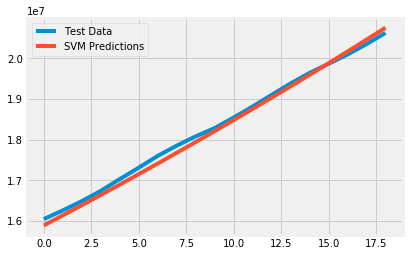

In [31]:
# check against testing data
svm_test_pred = svm_confirmed.predict(X_test_confirmed)
plt.plot(y_test_confirmed)
plt.plot(svm_test_pred)
plt.legend(['Test Data', 'SVM Predictions'])
print('MAE:', mean_absolute_error(svm_test_pred, y_test_confirmed))
print('MSE:',mean_squared_error(svm_test_pred, y_test_confirmed))


In [32]:
# transform our data for polynomial regression
poly = PolynomialFeatures(degree=5)
poly_X_train_confirmed = poly.fit_transform(X_train_confirmed)
poly_X_test_confirmed = poly.fit_transform(X_test_confirmed)
poly_future_forcast = poly.fit_transform(future_forecast)

bayesian_poly = PolynomialFeatures(degree=5)
bayesian_poly_X_train_confirmed = bayesian_poly.fit_transform(X_train_confirmed)
bayesian_poly_X_test_confirmed = bayesian_poly.fit_transform(X_test_confirmed)
bayesian_poly_future_forcast = bayesian_poly.fit_transform(future_forecast)

In [33]:
# polynomial regression
linear_model = LinearRegression(normalize=True, fit_intercept=False)
linear_model.fit(poly_X_train_confirmed, y_train_confirmed)
test_linear_pred = linear_model.predict(poly_X_test_confirmed)
linear_pred = linear_model.predict(poly_future_forcast)
print('MAE:', mean_absolute_error(test_linear_pred, y_test_confirmed))
print('MSE:',mean_squared_error(test_linear_pred, y_test_confirmed))

MAE: 92817.71945184155
MSE: 9921034179.97728


In [34]:
print(linear_model.coef_)

[[ 1.52970897e+07 -8.40508524e+05  1.66042528e+04 -1.45771246e+02
   6.15301003e-01 -9.68545473e-04]]


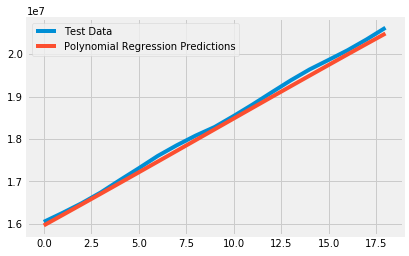

In [35]:
plt.plot(y_test_confirmed)
plt.plot(test_linear_pred)
plt.legend(['Test Data', 'Polynomial Regression Predictions'])

In [36]:
# bayesian ridge polynomial regression
tol = [1e-6, 1e-5, 1e-4, 1e-3, 1e-2]
alpha_1 = [1e-7, 1e-6, 1e-5, 1e-4, 1e-3]
alpha_2 = [1e-7, 1e-6, 1e-5, 1e-4, 1e-3]
lambda_1 = [1e-7, 1e-6, 1e-5, 1e-4, 1e-3]
lambda_2 = [1e-7, 1e-6, 1e-5, 1e-4, 1e-3]
normalize = [True, False]

bayesian_grid = {'tol': tol, 'alpha_1': alpha_1, 'alpha_2' : alpha_2, 'lambda_1': lambda_1, 'lambda_2' : lambda_2, 
                 'normalize' : normalize}

bayesian = BayesianRidge(fit_intercept=False)
bayesian_search = RandomizedSearchCV(bayesian, bayesian_grid, scoring='neg_mean_squared_error', cv=3, return_train_score=True, n_jobs=-1, n_iter=40, verbose=1)
bayesian_search.fit(bayesian_poly_X_train_confirmed, y_train_confirmed)

Fitting 3 folds for each of 40 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:    2.2s finished
C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=BayesianRidge(alpha_1=1e-06, alpha_2=1e-06,
                                           alpha_init=None, compute_score=False,
                                           copy_X=True, fit_intercept=False,
                                           lambda_1=1e-06, lambda_2=1e-06,
                                           lambda_init=None, n_iter=300,
                                           normalize=False, tol=0.001,
                                           verbose=False),
                   iid='deprecated', n_iter=40, n_jobs=-1,
                   param_distributions={'alpha_1': [1e-07, 1e-06, 1e-05, 0.0001,
                                                    0.001],
                                        'alpha_2': [1e-07, 1e-06, 1e-05, 0.0001,
                                                    0.001],
                                        'lambda_1': [1e-07, 1e-06, 1e-05,
                                  

In [37]:
bayesian_search.best_params_

{'tol': 0.01,
 'normalize': False,
 'lambda_2': 1e-07,
 'lambda_1': 0.0001,
 'alpha_2': 1e-06,
 'alpha_1': 1e-07}

In [38]:
bayesian_confirmed = bayesian_search.best_estimator_
test_bayesian_pred = bayesian_confirmed.predict(bayesian_poly_X_test_confirmed)
bayesian_pred = bayesian_confirmed.predict(bayesian_poly_future_forcast)
print('MAE:', mean_absolute_error(test_bayesian_pred, y_test_confirmed))
print('MSE:',mean_squared_error(test_bayesian_pred, y_test_confirmed))

MAE: 137290.39665044355
MSE: 28120234615.638866


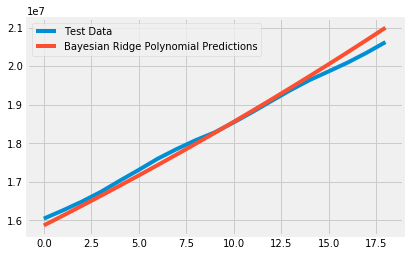

In [39]:
plt.plot(y_test_confirmed)
plt.plot(test_bayesian_pred)
plt.legend(['Test Data', 'Bayesian Ridge Polynomial Predictions'])

# Predictions for confirmed coronavirus cases worldwide

In [40]:
def plot_predictions(x, y, pred, algo_name, color):
    plt.figure(figsize=(16, 10))
    plt.plot(x, y)
    plt.plot(future_forecast, pred, linestyle='dashed', color=color)
    plt.title('Worldwide Coronavirus Cases Over Time', size=30)
    plt.xlabel('Days Since 1/22/2020', size=30)
    plt.ylabel('# of Cases', size=30)
    plt.legend(['Confirmed Cases', algo_name], prop={'size': 20})
    plt.xticks(size=20)
    plt.yticks(size=20)
    plt.show()

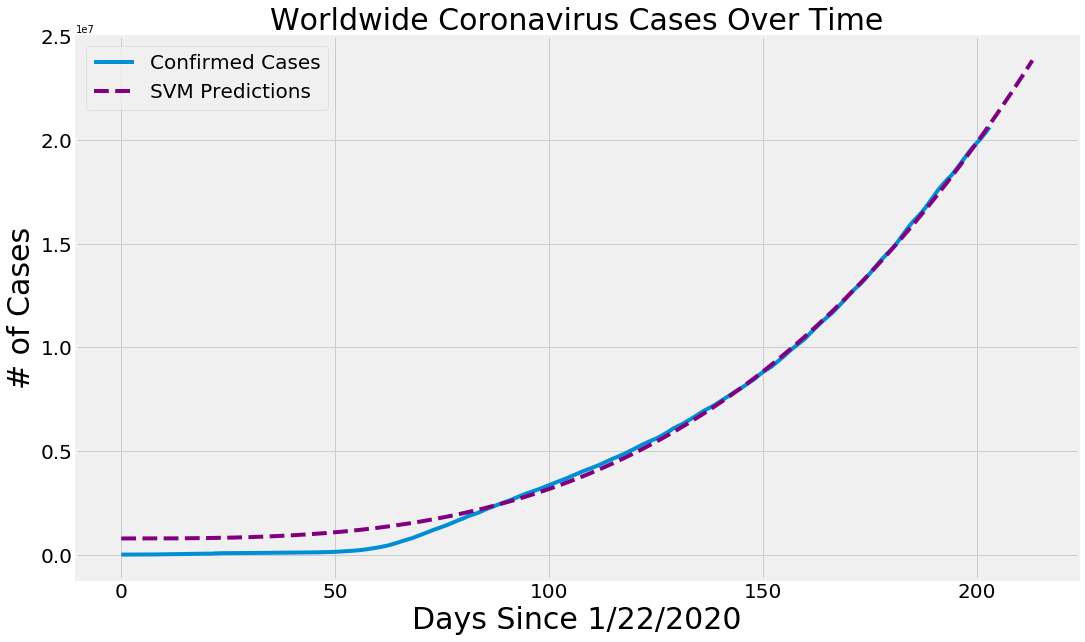

In [41]:
plot_predictions(adjusted_dates, world_cases, svm_pred, 'SVM Predictions', 'purple')

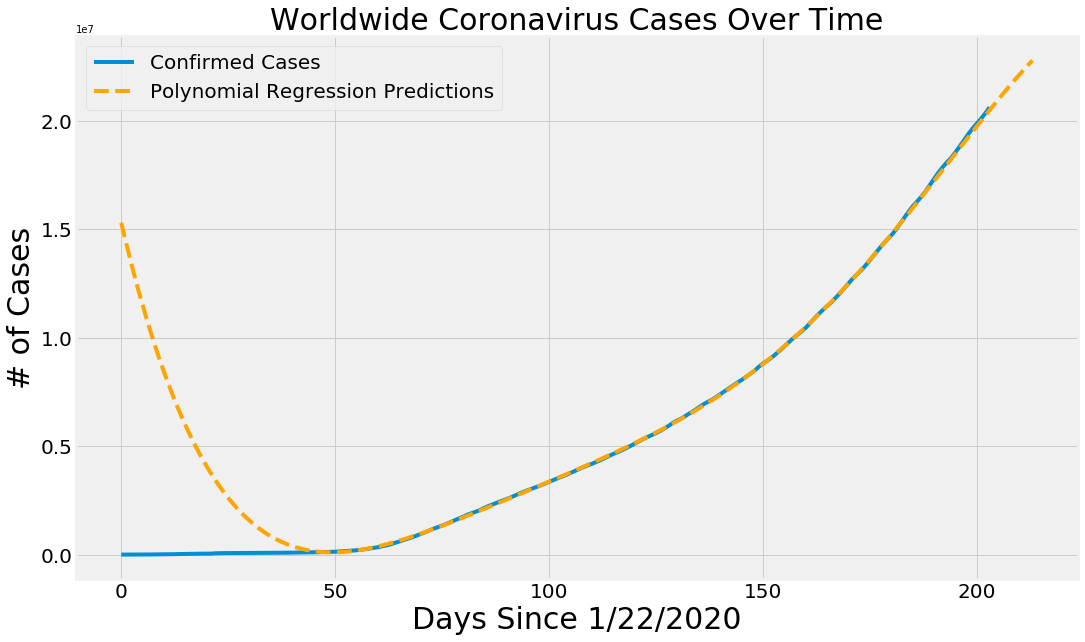

In [42]:
plot_predictions(adjusted_dates, world_cases, linear_pred, 'Polynomial Regression Predictions', 'orange')

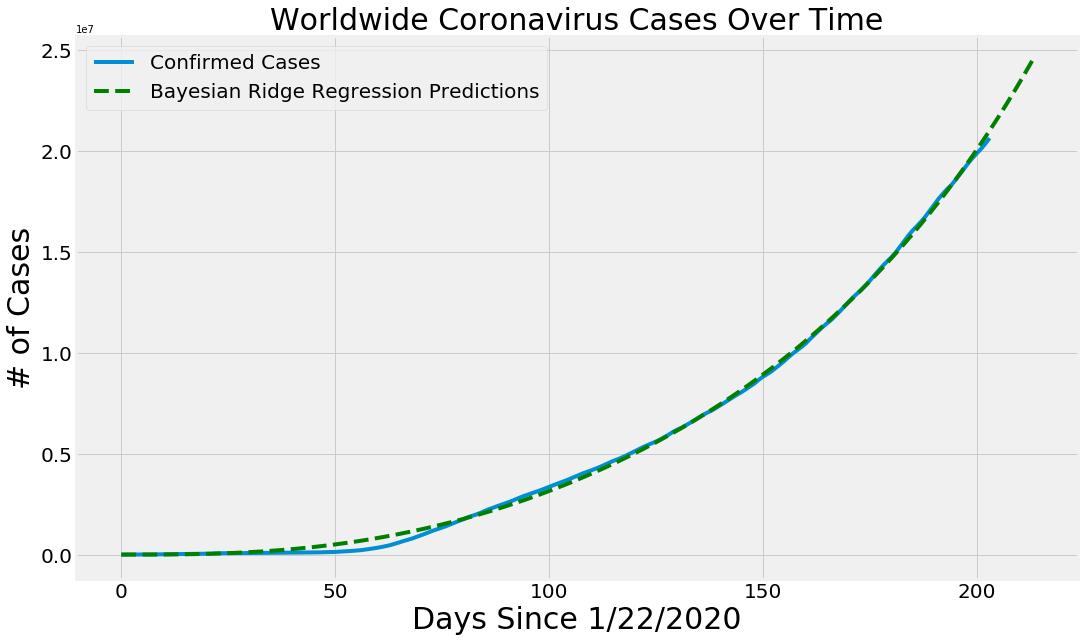

In [43]:
plot_predictions(adjusted_dates, world_cases, bayesian_pred, 'Bayesian Ridge Regression Predictions', 'green')

# Future predictions

In [44]:
# Future predictions using SVM 
svm_df = pd.DataFrame({'Date': future_forcast_dates[-10:], 'SVM Predicted # of Confirmed Cases Worldwide': np.round(svm_pred[-10:])})
svm_df

,Date,SVM Predicted # of Confirmed Cases Worldwide
0,08/13/2020,21043976.0
1,08/14/2020,21343454.0
2,08/15/2020,21645869.0
3,08/16/2020,21951235.0
4,08/17/2020,22259565.0
5,08/18/2020,22570874.0
6,08/19/2020,22885176.0
7,08/20/2020,23202486.0
8,08/21/2020,23522818.0
9,08/22/2020,23846186.0


In [45]:
# Future predictions using polynomial regression
linear_pred = linear_pred.reshape(1,-1)[0]
svm_df = pd.DataFrame({'Date': future_forcast_dates[-10:], 'Polynomial Predicted # of Confirmed Cases Worldwide': np.round(linear_pred[-10:])})
svm_df

,Date,Polynomial Predicted # of Confirmed Cases Worldwide
0,08/13/2020,20728795.0
1,08/14/2020,20970047.0
2,08/15/2020,21208622.0
3,08/16/2020,21444225.0
4,08/17/2020,21676554.0
5,08/18/2020,21905295.0
6,08/19/2020,22130127.0
7,08/20/2020,22350718.0
8,08/21/2020,22566727.0
9,08/22/2020,22777803.0


In [46]:
# Future predictions using Bayesian Ridge 
svm_df = pd.DataFrame({'Date': future_forcast_dates[-10:], 'Bayesian Ridge Predicted # of Confirmed Cases Worldwide': np.round(bayesian_pred[-10:])})
svm_df

,Date,Bayesian Ridge Predicted # of Confirmed Cases Worldwide
0,08/13/2020,21318909.0
1,08/14/2020,21648799.0
2,08/15/2020,21983522.0
3,08/16/2020,22323155.0
4,08/17/2020,22667780.0
5,08/18/2020,23017477.0
6,08/19/2020,23372328.0
7,08/20/2020,23732418.0
8,08/21/2020,24097831.0
9,08/22/2020,24468652.0
